## CMEE MSC Project 2019
### Synthetic data
---

In [1]:
# import tools #
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
plt.style.use("seaborn-white")

# add code path to environment #
import sys
sys.path.insert(1, "../Code/")

# import package for sum of exponential fitting #
import config
from sumexp import *

# functions #
def fit_sumexp(data, lower, upper, resolution, geom=True):
    # fit a sum of exponentials, return model, psi values
    if geom:
        config.FIXED_RATES = np.geomspace(lower, upper, resolution)
    else:
        config.FIXED_RATES = np.linspace(lower, upper, resolution)
    startest = [1/len(config.FIXED_RATES)] * (len(config.FIXED_RATES)-1)
    model = minimize_model(startest, data)
    psi = model.x
    psi = np.append(psi, 1-sum(psi))
    return (model, psi, config.FIXED_RATES)

A MLE: 1.8262592844318026
B MLE : 4.240504713245517
C MLE: 2.5530121515214237
Bounds: 1 - 10
Resolution: 150
---
Positive directional derivative for linesearch
MLE: 17950.91599810838

#####

[0.30701135 2.28723453] [0.0087361  0.99125876] 0.9999948637524966


0.30701134573253946 - 0.008736103260173645
2.287234525707419 - 0.991258760492323
AN Pest = 2.5530121515214237


-57.008172388246386

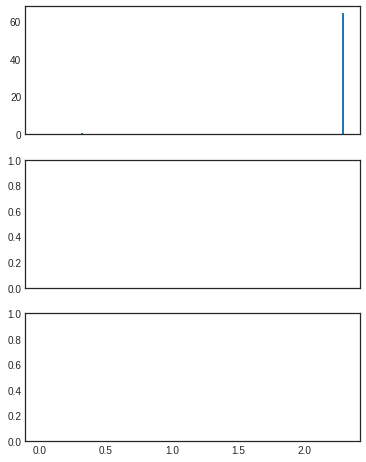

In [5]:
seed_val = 11
np.random.seed(seed_val)

n = 1000
a = np.random.exponential(1/1.8, int(n/2))
b = np.random.exponential(1/4.4, int(n/2))
c = np.concatenate([a, b])

print("A MLE: {}\nB MLE : {}\nC MLE: {}".format(1/np.mean(a), 1/np.mean(b), 1/np.mean(c)))


# fit with sum of exponentials
# Define the rates to use
lower = 1
upper = 10
resolution = 150

# fit model
model, psi, rts = fit_sumexp(np.log(c), lower, upper, resolution, geom=False)


# get the activated rates
active_p = np.where(psi > 0.001)
active_rts = rts[active_p]
active_psi = psi[active_p]

print("Bounds: {} - {}\nResolution: {}\n---\n{}\nMLE: {}".format(lower,
                                                                 upper,
                                                                 resolution,
                                                                 model.message,
                                                                 -model.fun,))

print("\n#####\n")

# Get histogram data
import matplotlib
matplotlib.rcParams.update({'font.size': 10})
fig, ax = plt.subplots(3, 1, sharex=True, sharey=False, figsize=(6, 8))


values, bins, _ = ax[0].hist(np.log(rts),
                             bins=resolution,
                             weights=psi,
                             density=True)


# show area of activated bins as weights for rates
areas = np.diff(bins)*values
area_t = sum(areas)
rte_idx = np.where(areas > 0.001)

print(bins[rte_idx], areas[rte_idx], sum(areas[rte_idx]))
print("\n")

for i in range(len(bins[rte_idx])):
    print("{} - {}".format(bins[rte_idx][i], areas[rte_idx][i]))

print("AN Pest = {}".format(1/np.mean(c)))


config.FIXED_RATES = [2.08, 4.9]
pwts = [0.68]
-sumexp_ll(pwts, c)

__Sum of exponentials:__ Generate data sampled from a sum of exponentials. 

The plots and working bellow show how the method identifies the original rate and associated proportion representated in the data. The ability to identify the actual underlying rates in the data is dependent upon the sample size of the data contributing for each rate. For example: With 1000 observations a split of 70/20 for rates 1.1 and 2.8 

MLE = 2.5475065986925296


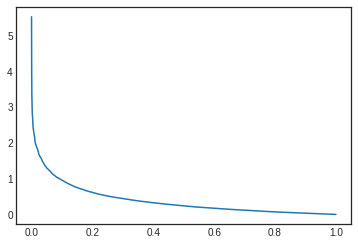

In [20]:
# set seed to track results
# create data
s_rts = [1.8, 4.4]
s_psi = [0.5, 0.5]
n = 10000

seed_val = 11
np.random.seed(seed_val)

sexp = sample_sumexp(s_rts, s_psi, n)
sexp = np.reshape(sexp, len(sexp))

print("MLE = {}".format(1/np.mean(sexp)))

pltdata = inverse_cdf(sexp)
plt.plot(pltdata["Probability"], pltdata["SortedData"])

Bounds: 1 - 10
Resolution: 150
---
Optimization terminated successfully.
MLE: -524.6803887159523

#####

[1.   1.84 1.9  4.6  9.94] [0.00399179 0.14444547 0.41628843 0.41591565 0.01935866] 0.9999999997864211


1.0 - 0.003991793557018132
1.8399999999999999 - 0.14444547142554431
1.9 - 0.4162884267563583
4.6 - 0.4159156455607618
9.94 - 0.01935866248673856
AN Pest = 2.5475065986925296


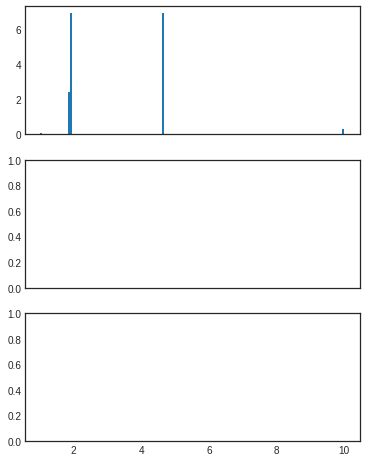

In [21]:
# fit with sum of exponentials
# Define the rates to use
lower = 1
upper = 10
resolution = 150

# fit model
model, psi, rts = fit_sumexp(sexp, lower, upper, resolution, geom=False)


# get the activated rates
active_p = np.where(psi > 0.001)
active_rts = rts[active_p]
active_psi = psi[active_p]

print("Bounds: {} - {}\nResolution: {}\n---\n{}\nMLE: {}".format(lower,
                                                                 upper,
                                                                 resolution,
                                                                 model.message,
                                                                 -model.fun,))

print("\n#####\n")

# Get histogram data
import matplotlib
matplotlib.rcParams.update({'font.size': 10})
fig, ax = plt.subplots(3, 1, sharex=True, sharey=False, figsize=(6, 8))


values, bins, _ = ax[0].hist(rts,
                             bins=resolution,
                             weights=psi,
                             density=True)


# show area of activated bins as weights for rates
areas = np.diff(bins)*values
area_t = sum(areas)
rte_idx = np.where(areas > 0.001)

print(bins[rte_idx], areas[rte_idx], sum(areas[rte_idx]))
print("\n")

for i in range(len(bins[rte_idx])):
    print("{} - {}".format(bins[rte_idx][i], areas[rte_idx][i]))

print("AN Pest = {}".format(1/np.mean(sexp)))


def single_exp(r, x):
    return np.sum(np.log(r*np.exp(-r*x)))

single_exp(1/np.mean(sexp), sexp)

# create table for report
df = pd.DataFrame({"$n$" : [1000] * len(bins[rte_idx]),"$\lambda$" : bins[rte_idx], "$\psi$" : areas[rte_idx]})

In [52]:
# set seed to track results
# create data
s_rts = [1.8, 4.4]
s_psi = [0.7, 0.3]
n = 10000

seed_val = 11
np.random.seed(seed_val)

sexp = sample_sumexp(s_rts, s_psi, n)
sexp = np.reshape(sexp, len(sexp))

In [53]:
# fit with sum of exponentials
# Define the rates to use
lower = 1
upper = 10
resolution = 150

# fit model
model, psi, rts = fit_sumexp(sexp, lower, upper, resolution, geom=False)


# get the activated rates
active_p = np.where(psi > 0.001)
active_rts = rts[active_p]
active_psi = psi[active_p]

print("Bounds: {} - {}\nResolution: {}\n---\n{}\nMLE: {}".format(lower,
                                                                 upper,
                                                                 resolution,
                                                                 model.message,
                                                                 -model.fun,))

print("\n#####\n")

values, bins, _ = ax[1].hist(rts,
                             bins=resolution,
                             weights=psi,
                             density=True)


# show area of activated bins as weights for rates
areas = np.diff(bins)*values
area_t = sum(areas)
rte_idx = np.where(areas > 0.001)

print(bins[rte_idx], areas[rte_idx], sum(areas[rte_idx]))
print("\n")

for i in range(len(bins[rte_idx])):
    print("{} - {}".format(bins[rte_idx][i], areas[rte_idx][i]))

print("AN Pest = {}".format(1/np.mean(sexp)))


def single_exp(r, x):
    return np.sum(np.log(r*np.exp(-r*x)))

single_exp(1/np.mean(sexp), sexp)

df1 = pd.DataFrame({"$n$" : [10000] * len(bins[rte_idx]),"$\lambda$" : bins[rte_idx], "$\psi$" : areas[rte_idx]})


Bounds: 1 - 10
Resolution: 150
---
Optimization terminated successfully.
MLE: 1393.919466884673

#####

[1.   2.02 4.06 4.12 9.94] [0.00880743 0.33155075 0.23848614 0.36044424 0.06071144] 0.9999999993419744


1.0 - 0.008807426284369325
2.02 - 0.3315507500348928
4.0600000000000005 - 0.23848614464352128
4.12 - 0.36044423820663196
9.94 - 0.06071144017255902
AN Pest = 3.086818686718762


In [54]:
# set seed to track results
# create data
s_rts = [1.8, 4.4]
s_psi = [0.7, 0.3]
n = 100000

seed_val = 11
np.random.seed(seed_val)

sexp = sample_sumexp(s_rts, s_psi, n)
sexp = np.reshape(sexp, len(sexp))


In [55]:
# fit with sum of exponentials
# Define the rates to use
lower = 1
upper = 10
resolution = 150

# fit model
model, psi, rts = fit_sumexp(sexp, lower, upper, resolution, geom=False)


# get the activated rates
active_p = np.where(psi > 0.001)
active_rts = rts[active_p]
active_psi = psi[active_p]

print("Bounds: {} - {}\nResolution: {}\n---\n{}\nMLE: {}".format(lower,
                                                                 upper,
                                                                 resolution,
                                                                 model.message,
                                                                 -model.fun,))

print("\n#####\n")

values, bins, _ = ax[2].hist(rts,
                             bins=resolution,
                             weights=psi,
                             density=True)


# show area of activated bins as weights for rates
areas = np.diff(bins)*values
area_t = sum(areas)
rte_idx = np.where(areas > 0.001)

print(bins[rte_idx], areas[rte_idx], sum(areas[rte_idx]))
print("\n")

for i in range(len(bins[rte_idx])):
    print("{} - {}".format(bins[rte_idx][i], areas[rte_idx][i]))

print("AN Pest = {}".format(1/np.mean(sexp)))


def single_exp(r, x):
    return np.sum(np.log(r*np.exp(-r*x)))

single_exp(1/np.mean(sexp), sexp)

df2 = pd.DataFrame({"$n$" : [100000] * len(bins[rte_idx]),"$\lambda$" : bins[rte_idx], "$\psi$" : areas[rte_idx]})

../Code/sumexp.py:47: RuntimeWarning: invalid value encountered in log
  return (-1)* sum(np.log(sumexp_eq(psi, x)))


Bounds: 1 - 10
Resolution: 150
---
Optimization terminated successfully.
MLE: 13824.400388362024

#####

[1.78 1.84 4.36 4.42 9.94] [0.24872705 0.04869255 0.5439432  0.1552868  0.00334955] 0.9999991485065375


1.78 - 0.24872705215606875
1.8399999999999999 - 0.048692548951820055
4.359999999999999 - 0.5439432003405492
4.42 - 0.15528680072676615
9.94 - 0.00334954633133333
AN Pest = 3.0759100227156253


In [56]:
# get table [Manual edditing may be required later for best look formating]
all_df = df.append(df1)
all_df = all_df.append(df2)

# save table
path = "../Results/LatexTables/Sum2exp_1844_73.tex"
with open(path, 'w') as tf:
     tf.write(all_df.to_latex(index=False, escape=False))
        
all_df

,$n$,$\lambda$,$\psi$
0,1000,1.54,0.047849
1,1000,1.60,0.129053
2,1000,3.82,0.352723
3,1000,3.88,0.382955
4,1000,3.94,0.087421
0,10000,1.00,0.008807
1,10000,2.02,0.331551
2,10000,4.06,0.238486
3,10000,4.12,0.360444
4,10000,9.94,0.060711


In [57]:
# make report plot
path = "../Results/Plots/SyntheticData_2exp1844_73.pdf"

fig.text(0.5, 0.08, '$\lambda$', ha='center')
fig.text(0.02, 0.5, 'Frequency', va='center', rotation='vertical')
fig.text(0.06, 0.88, 'A', fontweight='bold')
fig.text(0.06, 0.6, 'B', fontweight='bold')
fig.text(0.06, 0.34, 'C', fontweight='bold')
fig.wspace = 2.5

fig.savefig(path)